# Data preprocessing
## Preprocessing Airfare dataset
The data is loaded in airq dataframe

In [1]:
import pandas as pd
import sys
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
from sklearn.model_selection import train_test_split
colnames=['City1','City2','AvgFare','Distance','AvgWeekPsgrs',
          'MktLeadArLn','MktShare','AvgFareLead','LowPriceArLn','MktShareLow','Price']
filename = r"E:\Documents\University of Hildesheim\Machine learning lab\lab3\airq402.data"
airq = pd.read_fwf(filename, names=colnames)

In [2]:
airq.head()

,City1,City2,AvgFare,Distance,AvgWeekPsgrs,MktLeadArLn,MktShare,AvgFareLead,LowPriceArLn,MktShareLow,Price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


# Data Analysis
The dataset has no missing values and 4 columns with object values, these could be treated as categorical.

In [3]:
airq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
City1           1000 non-null object
City2           1000 non-null object
AvgFare         1000 non-null float64
Distance        1000 non-null int64
AvgWeekPsgrs    1000 non-null float64
MktLeadArLn     1000 non-null object
MktShare        1000 non-null float64
AvgFareLead     1000 non-null float64
LowPriceArLn    1000 non-null object
MktShareLow     1000 non-null float64
Price           1000 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.0+ KB


### Converting non-numeric values to numeric values using one-hot encoding of the columns

In [10]:
cats=['City1','City2','MktLeadArLn','LowPriceArLn']
airq[cats] = airq[cats].astype('category')


What can be experimented with is a simple categorical encoding, wherein each unique entry is assigned it's own number. Pandas does with relative ease by assigning desired object columns to a category dtype

In [11]:
airq.dtypes

City1           category
City2           category
AvgFare          float64
Distance           int64
AvgWeekPsgrs     float64
MktLeadArLn     category
MktShare         float64
AvgFareLead      float64
LowPriceArLn    category
MktShareLow      float64
Price            float64
dtype: object

In [12]:
airq_enc = airq.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)

In order to actually use the numeric representation, we need to get the underlying cat.codes from pandas.

In [13]:
airq_enc.dtypes

City1              int8
City2              int8
AvgFare         float64
Distance          int64
AvgWeekPsgrs    float64
MktLeadArLn        int8
MktShare        float64
AvgFareLead     float64
LowPriceArLn       int8
MktShareLow     float64
Price           float64
dtype: object

It is shown that each categorical values has its unique values

In [14]:
airq_enc.head()

,City1,City2,AvgFare,Distance,AvgWeekPsgrs,MktLeadArLn,MktShare,AvgFareLead,LowPriceArLn,MktShareLow,Price
0,16,0,114.47,528,424.56,6,70.19,111.03,8,70.19,111.03
1,16,40,122.47,860,276.84,6,75.10,123.09,6,17.23,118.94
2,2,0,214.42,852,215.76,4,78.89,223.98,5,2.77,167.12
3,2,7,69.40,288,606.84,14,96.97,68.86,17,96.97,68.86
4,2,52,158.13,723,313.04,12,39.79,161.36,17,15.34,145.42


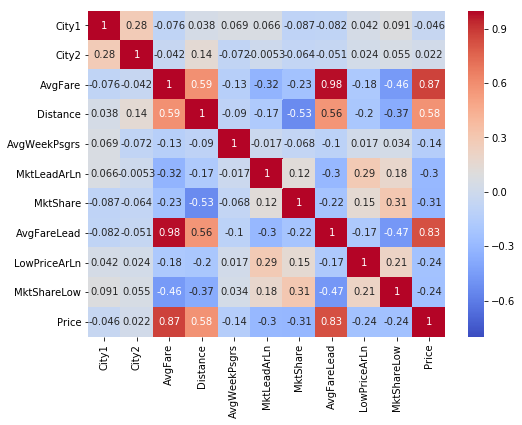

In [15]:
fig,ax = plt.subplots(figsize=(8,6))
sns.heatmap(airq_enc.corr(),vmin=-0.8, annot=True, cmap='coolwarm',ax=ax);

### So according to the above correlation heatmap AvgFare, Distance and AvgFareLead is closely related to the price.So other columns can be dropped because they are not closely correlated to price

So now we choose the selected features in Xdata and price in Ydata then split the dataset into 80% train set and 20% test set.

In [16]:

Ydata = airq_enc['Price'] 
Xdata = airq_enc[['AvgFare','Distance','AvgFareLead']]
Xdata = (Xdata - Xdata.mean())/Xdata.std()

x_train_airq, x_test_airq, y_train_airq, y_test_airq =train_test_split(Xdata, 
                                                                       Ydata,train_size=0.8, 
                                                                       test_size=0.2, 
                                                                       random_state=0)
y_train_airq=y_train_airq.values.reshape(-1,1)
y_test_airq=y_test_airq.values.reshape(-1,1)

## Preprocessing Wine Quality Data

In [17]:
filename=r"E:\Documents\University of Hildesheim\Machine learning lab\lab3\winequality-red.csv"
wine_data = pd.read_csv(filename,delimiter=';')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


The data has no non-numeric values

In [18]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


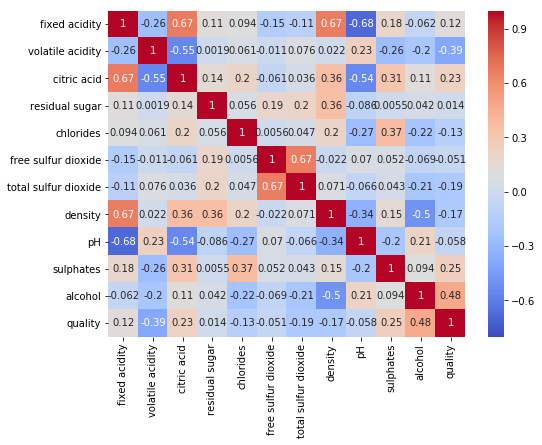

In [19]:
fig,ax = plt.subplots(figsize=(8,6))
sns.heatmap(wine_data.corr(),vmin=-0.8, annot=True, cmap='coolwarm',ax=ax);

So according to above correlation heat map fixed acidity', 'volatile acidity', 'citric acid','chlorides', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol' are closely related to 'quality' and the rest of the column is not closely related so that can dropped

So now we choose the selected features in Xdata and price in Ydata then split the dataset into 80% train set and 20% test set.

In [20]:
features = ['fixed acidity', 'volatile acidity', 'citric acid',
       'chlorides', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']
Xdata = wine_data[features]
Ydata = wine_data['quality']

x_train_wine, x_test_wine, y_train_wine, y_test_wine =train_test_split(Xdata, 
                                                                       Ydata,train_size=0.8, 
                                                                       test_size=0.2, 
                                                                       random_state=0)

## Preprocessing Parkisons Dataset

In [21]:
filename = r"E:\Documents\University of Hildesheim\Machine learning lab\lab3\parkinsons_updrs.data"
park = pd.read_csv(filename)

In [22]:
park.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [23]:
park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
subject#         5875 non-null int64
age              5875 non-null int64
sex              5875 non-null int64
test_time        5875 non-null float64
motor_UPDRS      5875 non-null float64
total_UPDRS      5875 non-null float64
Jitter(%)        5875 non-null float64
Jitter(Abs)      5875 non-null float64
Jitter:RAP       5875 non-null float64
Jitter:PPQ5      5875 non-null float64
Jitter:DDP       5875 non-null float64
Shimmer          5875 non-null float64
Shimmer(dB)      5875 non-null float64
Shimmer:APQ3     5875 non-null float64
Shimmer:APQ5     5875 non-null float64
Shimmer:APQ11    5875 non-null float64
Shimmer:DDA      5875 non-null float64
NHR              5875 non-null float64
HNR              5875 non-null float64
RPDE             5875 non-null float64
DFA              5875 non-null float64
PPE              5875 non-null float64
dtypes: float64(19), int64(3)
memory usag

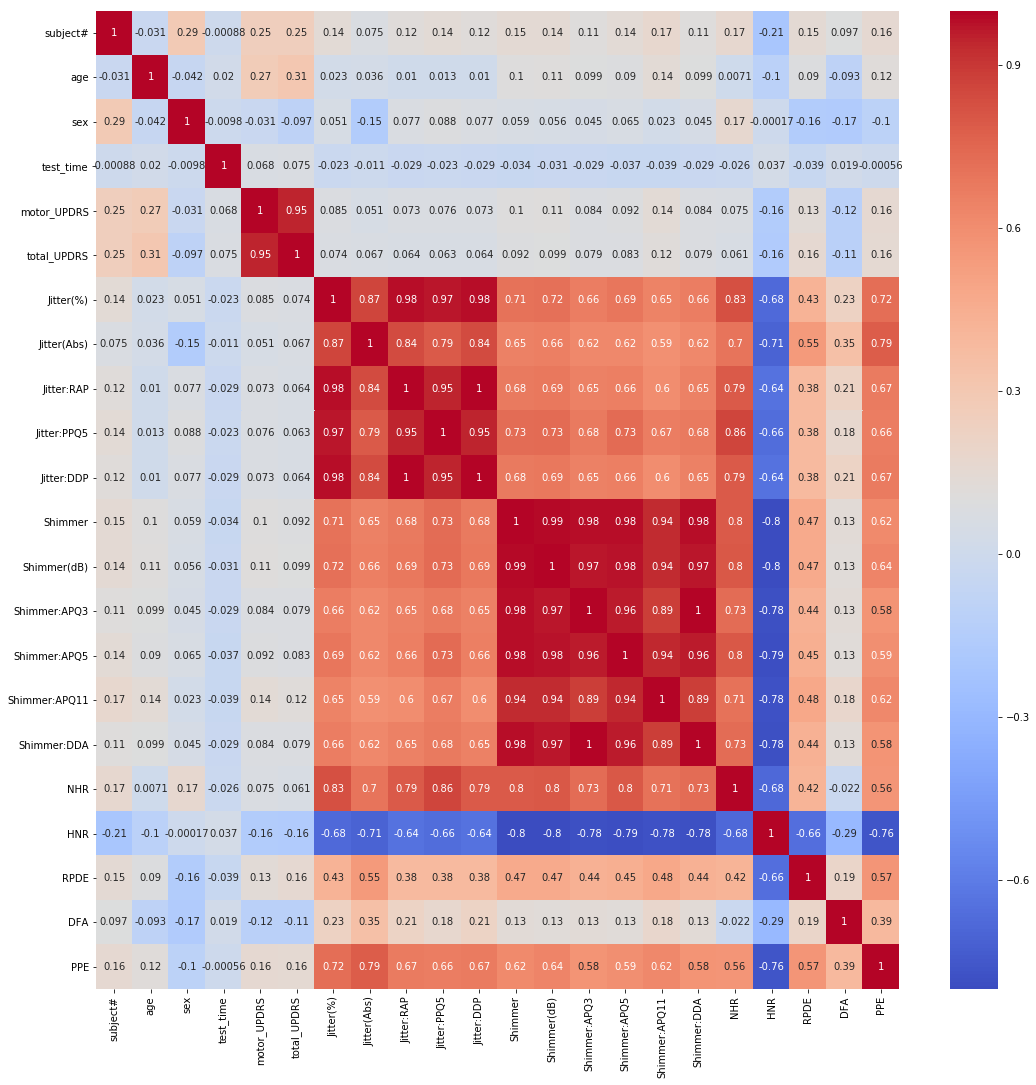

In [24]:
fig,ax = plt.subplots(figsize=(18,18))
sns.heatmap(park.corr(),vmin=-0.8, annot=True, cmap='coolwarm',ax=ax);

So according to above correlation heat map 'subject#','age','motor_UPDRS','NHR','RPDE','PPE' are closely related to total_UPDRS


In [25]:
features=['subject#','age','motor_UPDRS','NHR','RPDE','PPE']
Xdata = park[features]
Ydata = park['total_UPDRS']
#Xdata = (Xdata - Xdata.mean())/Xdata.std()
x_train_park, x_test_park, y_train_park, y_test_park =train_test_split(Xdata, 
                                                                       Ydata,train_size=0.8, 
                                                                       test_size=0.2, 
                                                                       random_state=0)

## Linear regression using gradient descent with airfare dataset

In [54]:
Xtrain_airq = x_train_airq.values
ytrain_airq = y_train_airq
Xtest_airq  = x_test_airq.values.reshape(-1,3)
ytest_airq = y_test_airq.reshape(-1,1)

In [55]:
m_train,n_features = Xtrain_airq.shape
np.random.seed(1)
betas = np.random.random(n_features).reshape(-1,1)
bias  = np.random.random(1)

print(f'shape of xtrain is {Xtrain_airq.shape}')
print(f'shape of betas is {betas.shape}')
print(f'shape of bias is {bias.shape}')
print(f'shape of ytrain is {ytrain_airq.shape}')
print(f'shape of Xtest is {Xtest_airq.shape}')
print(f'shape of ytest is {ytest_airq.shape}')

prediction = lambda X,betas,bias: X.dot(betas) + bias
cost       = lambda y,ypred: np.mean((y - ypred)**2)
rmse       = lambda y,ypred: np.sqrt(np.mean((y-ypred)**2))

shape of xtrain is (800, 3)
shape of betas is (3, 1)
shape of bias is (1,)
shape of ytrain is (800, 1)
shape of Xtest is (200, 3)
shape of ytest is (200, 1)


In [40]:

lr = 0.001  # The learning Rate
epochs = 1000 # The number of iterations to perform gradient descent
test_set_rmse = []
relative_loss=[]
# Performing Gradient Descent 
for i in range(epochs): 
    ypred = prediction(Xtrain_airq,betas,bias) # The current predicted value of Y
    lossa  = cost(ytrain_airq,ypred)
    
    betas = betas - lr * np.sum(2/m_train * (ypred - ytrain_airq) * Xtrain_airq, axis = 0)
    bias  = bias  - lr * np.sum(2/m_train * (ypred - ytrain_airq), axis = 0)
    
    testrmse = rmse(ytest_airq,prediction(Xtest_airq,betas,bias))
    test_set_rmse.append(testrmse)
    
    ypred = prediction(Xtrain_airq,betas,bias) # The current predicted value of Y
    lossb  = cost(ytrain_airq,ypred)
    
    relative_loss.append(np.abs(lossb -lossa))
    if i % 50 == 0:
        print(f"epochs: {i} loss: {np.abs(lossb -lossa)} testrmse: {testrmse}")


epochs: 0 loss: 96.27456094216541 testrmse: 149.68786423333088
epochs: 50 loss: 75.68378850591762 testrmse: 134.7146641821711
epochs: 100 loss: 60.09118377551022 testrmse: 121.57198152578786
epochs: 150 loss: 48.07921877922672 testrmse: 109.97571103601433
epochs: 200 loss: 38.69444857371491 testrmse: 99.70586475275769
epochs: 250 loss: 31.27936663933542 testrmse: 90.58865262680287
epochs: 300 loss: 25.368876883007943 testrmse: 82.48395506718632
epochs: 350 loss: 20.62577909799802 testrmse: 75.2765437408394
epochs: 400 loss: 16.799965166769653 testrmse: 68.86988368959692
epochs: 450 loss: 13.70214793121113 testrmse: 63.181703474308975
epochs: 500 loss: 11.186593242282925 testrmse: 58.14077501709929
epochs: 550 loss: 9.139504475382182 testrmse: 53.6845254677846
epochs: 600 loss: 7.47101387607745 testrmse: 49.757230217520444
epochs: 650 loss: 6.109519944415297 testrmse: 46.30862458005083
epochs: 700 loss: 4.997584471145274 testrmse: 43.29283242724706
epochs: 750 loss: 4.088891489141133 te

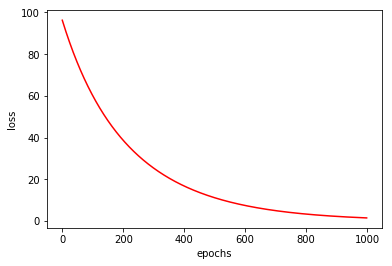

In [41]:
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot( np.arange(epochs),relative_loss,'r')

The relative loss decreases as the increasing number of epochs

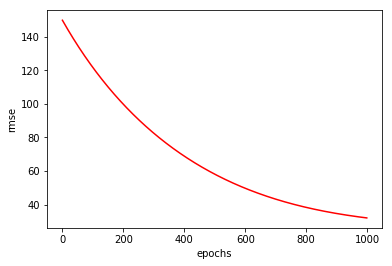

In [42]:
plt.xlabel("epochs")
plt.ylabel("rmse")
plt.plot( np.arange(epochs),test_set_rmse,'r')

# Step length backtracking algorithm function

In [43]:
def backtracking(Xtrain_airq,ytrain_airq,betas,bias,alpha = 0.3, beta = 0.5):
    mhu = 1
    contiter = True
    iterations = 0
    
    while contiter:
    
        ypred = prediction(Xtrain_airq,betas,bias) # The current predicted value of Y
        lossa  = cost(ytrain_airq,ypred)

        grad_beta = np.sum(2/m_train * (ypred - ytrain_airq) * Xtrain_airq, axis = 0)
        grad_bias = np.sum(2/m_train * (ypred - ytrain_airq), axis = 0)

        condb = lossa - alpha*mhu*(grad_beta.T.dot(grad_beta) + np.sum(grad_bias**2))

        betas = betas - mhu * grad_beta
        bias  = bias  - mhu * grad_bias

        ypred = prediction(Xtrain_airq,betas,bias) # The current predicted value of Y
        conda  = cost(ytrain_airq,ypred)
        
        if conda > condb:
            mhu = beta * mhu
            iterations += 1
        else:
            return mhu
        
        if iterations == 250:
            break
    return mhu

# Step length bolddriver algorithm function

In [44]:
def bolddriver(Xtrain_airq,ytrain_airq,betas,bias,lr, mhuplus = 1.1, mhuminus = 0.5):
    
    lr = lr*mhuplus
    contiter = True
    iterations = 0
    
    while contiter:
    
        ypred = prediction(Xtrain_airq,betas,bias) # The current predicted value of Y
        lossa  = cost(ytrain_airq,ypred)

        grad_beta = np.sum(2/m_train * (ypred - ytrain_airq) * Xtrain_airq, axis = 0)
        grad_bias = np.sum(2/m_train * (ypred - ytrain_airq), axis = 0)


        betas = betas - lr * grad_beta
        bias  = bias  - lr * grad_bias

        ypred = prediction(Xtrain_airq,betas,bias) # The current predicted value of Y
        lossb  = cost(ytrain_airq,ypred)
        
        
        if lossa - lossb <= 0:
            lr = lr*mhuminus
            iterations += 1
        else:
            return lr
        
        if iterations == 250:
            break
    return lr

# Using steplength backtracking on airfare dataset

In [50]:
betas = np.random.random(n_features).reshape(-1,1)
epochs =100 # The number of iterations to perform gradient descent
test_set_rmse = []
relative_loss=[]
lr = 0.001
# Performing Gradient Descent 
for i in range(epochs): 
    ypred = prediction(Xtrain_airq,betas,bias) # The current predicted value of Y
    lossa  = cost(ytrain_airq,ypred)
    
    lr =  backtracking(Xtrain_airq,ytrain_airq,betas,bias,alpha = 0.3, beta = 0.5)
    
    betas = betas - lr * np.sum(2/m_train * (ypred - ytrain_airq) * Xtrain_airq, axis = 0)
    bias  = bias  - lr * np.sum(2/m_train * (ypred - ytrain_airq), axis = 0)
    
    testrmse = rmse(ytest_airq,prediction(Xtest_airq,betas,bias))
    test_set_rmse.append(testrmse)
    
    ypred = prediction(Xtrain_airq,betas,bias) # The current predicted value of Y
    lossb  = cost(ytrain_airq,ypred)
    
    relative_loss.append(np.abs(lossb -lossa))
    if i % 10 == 0:
        print(f"epochs: {i} loss: {np.abs(lossb -lossa)} testrmse: {testrmse} learning rate: {lr}")

epochs: 0 loss: 16655.267458533934 testrmse: 76.13342302902709 learning rate: 0.25
epochs: 10 loss: 5.65403990528705 testrmse: 26.21253038706089 learning rate: 0.125
epochs: 20 loss: 8.718188837519847e-09 testrmse: 26.15803235758759 learning rate: 2.384185791015625e-07
epochs: 30 loss: 4.358980731922202e-09 testrmse: 26.158032369937132 learning rate: 1.1920928955078125e-07
epochs: 40 loss: 1.7435922927688807e-08 testrmse: 26.15803238568272 learning rate: 4.76837158203125e-07
epochs: 50 loss: 8.717961463844404e-09 testrmse: 26.1580323967972 learning rate: 2.384185791015625e-07
epochs: 60 loss: 4.358980731922202e-09 testrmse: 26.15803240791164 learning rate: 1.1920928955078125e-07
epochs: 70 loss: 4.3587533582467586e-09 testrmse: 26.15803242026097 learning rate: 1.1920928955078125e-07
epochs: 80 loss: 8.71773409016896e-09 testrmse: 26.15803243353644 learning rate: 2.384185791015625e-07
epochs: 90 loss: 8.71773409016896e-09 testrmse: 26.158032444650743 learning rate: 2.384185791015625e-07

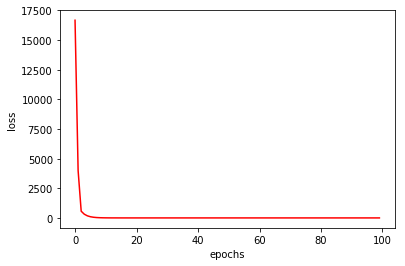

In [51]:
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot( np.arange(epochs),relative_loss,'r')

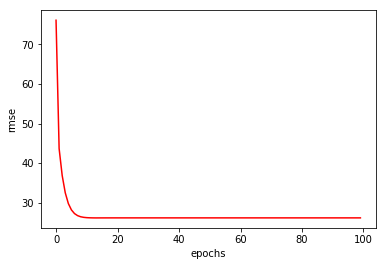

In [52]:
plt.xlabel("epochs")
plt.ylabel("rmse")
plt.plot( np.arange(epochs),test_set_rmse,'r')

# Using stepsize bolddriver on airfare dataset

In [56]:
betas = np.random.random(n_features).reshape(-1,1)
epochs =100 # The number of iterations to perform gradient descent
test_set_rmse = []
relative_loss=[]
lr = 0.001
# Performing Gradient Descent 
for i in range(epochs): 
    ypred = prediction(Xtrain_airq,betas,bias) # The current predicted value of Y
    lossa  = cost(ytrain_airq,ypred)
    
    lr =  bolddriver(Xtrain_airq,ytrain_airq,betas,bias,lr,mhuplus = 1.1, mhuminus = 0.5)
    
    betas = betas - lr * np.sum(2/m_train * (ypred - ytrain_airq) * Xtrain_airq, axis = 0)
    bias  = bias  - lr * np.sum(2/m_train * (ypred - ytrain_airq), axis = 0)
    
    testrmse = rmse(ytest_airq,prediction(Xtest_airq,betas,bias))
    test_set_rmse.append(testrmse)
    
    ypred = prediction(Xtrain_airq,betas,bias) # The current predicted value of Y
    lossb  = cost(ytrain_airq,ypred)
    
    relative_loss.append(np.abs(lossb -lossa))
    if i % 10 == 0:
        print(f"epochs: {i} loss: {np.abs(lossb -lossa)} testrmse: {testrmse} learning rate: {lr}")

epochs: 0 loss: 106.38650899977802 testrmse: 149.78906740752026 learning rate: 0.0011
epochs: 10 loss: 252.61873126025966 testrmse: 143.749627211556 learning rate: 0.0028531167061100022
epochs: 20 loss: 524.211479757927 testrmse: 129.41167052362798 learning rate: 0.007400249944258173
epochs: 30 loss: 785.346504889063 testrmse: 99.47610813121497 learning rate: 0.019194342495775094
epochs: 40 loss: 531.7648976918881 testrmse: 53.619440904070686 learning rate: 0.049785181124993715
epochs: 50 loss: 38.67760218284673 testrmse: 26.821370839554973 learning rate: 0.1291299381676654
epochs: 60 loss: 0.0018843479869019575 testrmse: 26.147878008845666 learning rate: 0.33492980349556173
epochs: 70 loss: 1.1368683772161603e-13 testrmse: 26.148279850984302 learning rate: 4.1423876403779445e-07
epochs: 80 loss: 0.0 testrmse: 26.148279850984295 learning rate: 0.0
epochs: 90 loss: 0.0 testrmse: 26.148279850984295 learning rate: 0.0


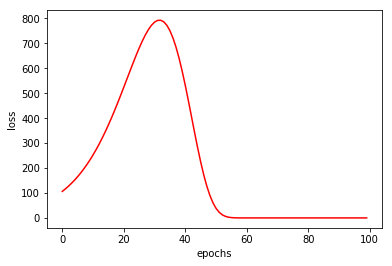

In [57]:
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot( np.arange(epochs),relative_loss,'r')

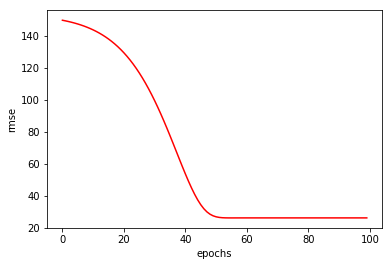

In [58]:
plt.xlabel("epochs")
plt.ylabel("rmse")
plt.plot( np.arange(epochs),test_set_rmse,'r')

## Linear regression using gradient descent with wine quality dataset

In [75]:
Xtrain_wine = x_train_wine.values
Xtest_wine=x_test_wine.values
ytrain_wine = y_train_wine.values.reshape(-1,1)
ytest_wine=y_test_wine.values.reshape(-1,1)
m_train,n_features = Xtrain_wine.shape
np.random.seed(1)
betas = np.random.random(n_features).reshape(-1,1)
bias  = np.random.random(1)

print(f'shape of xtrain is {Xtrain_wine.shape}')
print(f'shape of betas is {betas.shape}')
print(f'shape of bias is {bias.shape}')
print(f'shape of ytrain is {ytrain_wine.shape}')
print(f'shape of Xtest is {x_test_wine.shape}')
print(f'shape of ytest is {ytest_wine.shape}')

shape of xtrain is (1279, 8)
shape of betas is (8, 1)
shape of bias is (1,)
shape of ytrain is (1279, 1)
shape of Xtest is (320, 8)
shape of ytest is (320, 1)


In [60]:
lr = 0.0001  # The learning Rate
epochs = 100 # The number of iterations to perform gradient descent
test_set_rmse = []
relative_loss=[]
# Performing Gradient Descent 
for i in range(epochs): 
    ypred = prediction(Xtrain_wine,betas,bias) # The current predicted value of Y
    
    lossa  = cost(ytrain_wine,ypred)
    
    betas = betas - lr * np.sum(2/m_train * (ypred - ytrain_wine) * ytrain_wine, axis = 0)
    bias  = bias  - lr * np.sum(2/m_train * (ypred - ytrain_wine), axis = 0)
    
    testrmse = rmse(ytest_wine,prediction(Xtest_wine,betas,bias))
    test_set_rmse.append(testrmse)
    
    ypred = prediction(Xtrain_wine,betas,bias) # The current predicted value of Y
    lossb  = cost(ytrain_wine,ypred)
    
    relative_loss.append(np.abs(lossb -lossa))
    if i % 10 == 0:
        print(f"epochs: {i} loss: {np.abs(lossb -lossa)} testrmse: {testrmse} ")

epochs: 0 loss: 16.04166204965182 testrmse: 9.246407850838281
epochs: 10 loss: 3.3785246962325317 testrmse: 4.3890815141978035
epochs: 20 loss: 0.7398443951188165 testrmse: 2.2650165026366613
epochs: 30 loss: 0.17432537541295678 testrmse: 1.398177850742823
epochs: 40 loss: 0.046224841333477595 testrmse: 1.083097695833671
epochs: 50 loss: 0.01425709339764869 testrmse: 0.9760861753484902
epochs: 60 loss: 0.005085531629696827 testrmse: 0.938235158633023
epochs: 70 loss: 0.002015674403973433 testrmse: 0.9236437376691806
epochs: 80 loss: 0.0008480442530929277 testrmse: 0.9176183047890731
epochs: 90 loss: 0.0003655652068179638 testrmse: 0.9150368036581492


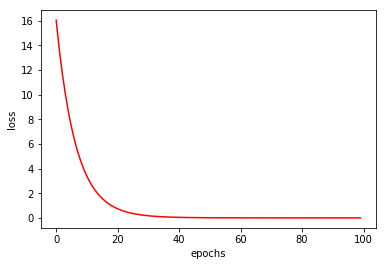

In [61]:
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot( np.arange(epochs),relative_loss,'r')

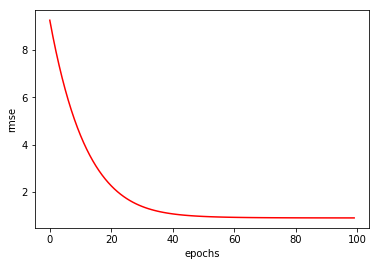

In [62]:
plt.xlabel("epochs")
plt.ylabel("rmse")
plt.plot( np.arange(epochs),test_set_rmse,'r')

# Using steplength backtracking on wine quality dataset

In [76]:
epochs = 100 # The number of iterations to perform gradient descent
test_set_rmse = []
relative_loss=[]
# Performing Gradient Descent 
for i in range(epochs): 
    ypred = prediction(Xtrain_wine,betas,bias) # The current predicted value of Y
    
    lossa  = cost(ytrain_wine,ypred)
    
    lr =  backtracking(Xtrain_wine,ytrain_wine,betas,bias,alpha = 0.1, beta = 0.5)
    
    betas = betas - lr * np.sum(2/m_train * (ypred - ytrain_wine) * ytrain_wine, axis = 0)
    bias  = bias  - lr * np.sum(2/m_train * (ypred - ytrain_wine), axis = 0)
    
    testrmse = rmse(ytest_wine,prediction(Xtest_wine,betas,bias))
    test_set_rmse.append(testrmse)
    
    ypred = prediction(Xtrain_wine,betas,bias) # The current predicted value of Y
    lossb  = cost(ytrain_wine,ypred)
    
    relative_loss.append(np.abs(lossb -lossa))
    if i % 10 == 0:
        print(f"epochs: {i} loss: {np.abs(lossb -lossa)} testrmse: {testrmse}")

epochs: 0 loss: 9.938426130367276 testrmse: 9.533664059957452
epochs: 10 loss: 3.884244087129815 testrmse: 6.050696040054879
epochs: 20 loss: 1.5337399793110578 testrmse: 3.9132784337185225
epochs: 30 loss: 0.615146487674191 testrmse: 2.6179811213403528
epochs: 40 loss: 0.2524627642299202 testrmse: 1.8521185965170137
epochs: 50 loss: 0.10701902958977882 testrmse: 1.4167840182932572
epochs: 60 loss: 0.04733889764350563 testrmse: 1.1805042999942603
epochs: 70 loss: 0.02204682457446494 testrmse: 1.0565377283144994
epochs: 80 loss: 0.010862324634149934 testrmse: 0.9919529257961985
epochs: 90 loss: 0.005654829978232856 testrmse: 0.9576962742487914


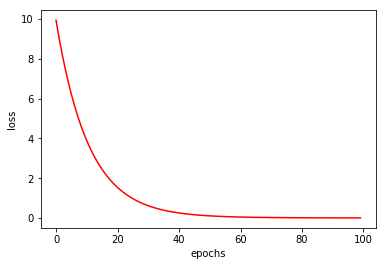

In [67]:
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot( np.arange(epochs),relative_loss,'r')

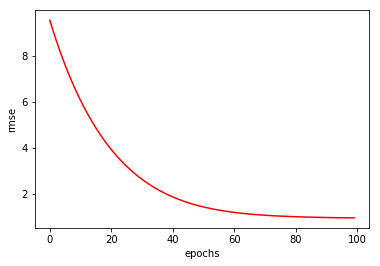

In [68]:
plt.xlabel("epochs")
plt.ylabel("rmse")
plt.plot( np.arange(epochs),test_set_rmse,'r')

# Using steplength bolddriver on wine quality dataset

In [70]:
lr=0.001
epochs = 100 # The number of iterations to perform gradient descent
test_set_rmse = []
relative_loss=[]
# Performing Gradient Descent 
for i in range(epochs): 
    ypred = prediction(Xtrain_wine,betas,bias) # The current predicted value of Y
    
    lossa  = cost(ytrain_wine,ypred)
    lr =  bolddriver(Xtrain_wine,ytrain_wine,betas,bias,lr,mhuplus = 1.1, mhuminus = 0.5)
    betas = betas - lr * np.sum(2/m_train * (ypred - ytrain_wine) * ytrain_wine, axis = 0)
    bias  = bias  - lr * np.sum(2/m_train * (ypred - ytrain_wine), axis = 0)
    
    testrmse = rmse(ytest_wine,prediction(Xtest_wine,betas,bias))
    test_set_rmse.append(testrmse)
    
    ypred = prediction(Xtrain_wine,betas,bias) # The current predicted value of Y
    lossb  = cost(ytrain_wine,ypred)
    
    relative_loss.append(np.abs(lossb -lossa))
    if i % 10 == 0:
        print(f"epochs: {i} loss: {np.abs(lossb -lossa)} testrmse: {testrmse}")

epochs: 0 loss: 21.73776549321728 testrmse: 8.9700259349945
epochs: 10 loss: 1.3577250637364369 testrmse: 2.204198624348257
epochs: 20 loss: 0.10171352505771014 testrmse: 1.0573683499211322
epochs: 30 loss: 0.008250412606943258 testrmse: 0.9389563544554819
epochs: 40 loss: 0.0022810252328180347 testrmse: 0.9188126418620965
epochs: 50 loss: 0.0003562249415665075 testrmse: 0.9145400669675887
epochs: 60 loss: 0.00012338279034984634 testrmse: 0.9134602871786587
epochs: 70 loss: 2.3735842059169343e-05 testrmse: 0.913190517691088
epochs: 80 loss: 5.830652046290297e-06 testrmse: 0.9131812993145818
epochs: 90 loss: 1.5136573226492978e-05 testrmse: 0.9132290995904344


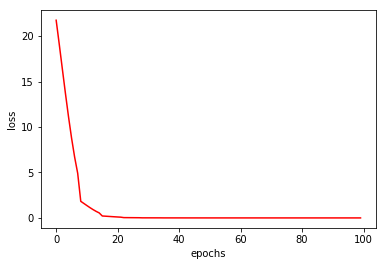

In [71]:
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot( np.arange(epochs),relative_loss,'r')

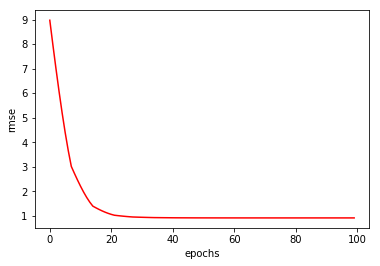

In [72]:
plt.xlabel("epochs")
plt.ylabel("rmse")
plt.plot( np.arange(epochs),test_set_rmse,'r')

## Linear regression using gradient descent with Parkisons Dataset

In [103]:
Xtrain_park = x_train_park.values
Xtest_park=x_test_park.values
ytrain_park = y_train_park.values.reshape(-1,1)
ytest_park=y_test_park.values.reshape(-1,1)
m_train,n_features = Xtrain_park.shape
np.random.seed(1)
betas = np.random.random(n_features).reshape(-1,1)
bias  = np.random.random(1)

print(f'shape of xtrain is {Xtrain_park.shape}')
print(f'shape of betas is {betas.shape}')
print(f'shape of bias is {bias.shape}')
print(f'shape of ytrain is {ytrain_park.shape}')
print(f'shape of Xtest is {x_test_park.shape}')
print(f'shape of ytest is {ytest_park.shape}')

shape of xtrain is (4700, 6)
shape of betas is (6, 1)
shape of bias is (1,)
shape of ytrain is (4700, 1)
shape of Xtest is (1175, 6)
shape of ytest is (1175, 1)


In [78]:
lr = 0.000001  # The learning Rate
epochs = 1000 # The number of iterations to perform gradient descent
test_set_rmse = []
relative_loss=[]
# Performing Gradient Descent 
for i in range(epochs): 
    ypred = prediction(Xtrain_park,betas,bias) # The current predicted value of Y
    
    lossa  = cost(ytrain_park,ypred)
    
    betas = betas - lr * np.sum(2/m_train * (ypred - ytrain_park) * ytrain_park, axis = 0)
    bias  = bias  - lr * np.sum(2/m_train * (ypred - ytrain_park), axis = 0)
    
    testrmse = rmse(ytest_park,prediction(Xtest_park,betas,bias))
    test_set_rmse.append(testrmse)
    
    ypred = prediction(Xtrain_park,betas,bias) # The current predicted value of Y
    lossb  = cost(ytrain_park,ypred)
    
    relative_loss.append(np.abs(lossb -lossa))
    if i % 50 == 0:
        print(f"epochs: {i} loss: {np.abs(lossb -lossa)} testrmse: {testrmse}")

epochs: 0 loss: 8.195926234175772 testrmse: 28.501302127958756
epochs: 50 loss: 4.4175684188327295 testrmse: 22.661176999342004
epochs: 100 loss: 2.4146416001446482 testrmse: 18.75452596947264
epochs: 150 loss: 1.3429541199797086 testrmse: 16.210491117590948
epochs: 200 loss: 0.7625928486328917 testrmse: 14.593097476023953
epochs: 250 loss: 0.44349204674378484 testrmse: 13.580679182975004
epochs: 300 loss: 0.2647452386478619 testrmse: 12.949700840883349
epochs: 350 loss: 0.16239641338668775 testrmse: 12.55407294142943
epochs: 400 loss: 0.1023211489417406 testrmse: 12.302652401875706
epochs: 450 loss: 0.06610620077049134 testrmse: 12.140066388751103
epochs: 500 loss: 0.04367291576915022 testrmse: 12.032965490968452
epochs: 550 loss: 0.029406361677274617 testrmse: 11.961167781682754
epochs: 600 loss: 0.020111804670648326 testrmse: 11.912288822865728
epochs: 650 loss: 0.013927208987695394 testrmse: 11.87858154592506
epochs: 700 loss: 0.009738407067430899 testrmse: 11.855094732001186
epoch

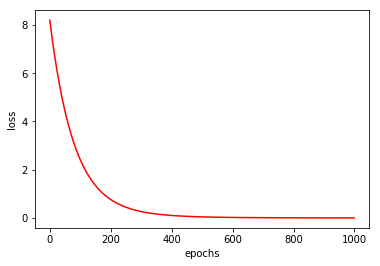

In [79]:
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot( np.arange(epochs),relative_loss,'r')

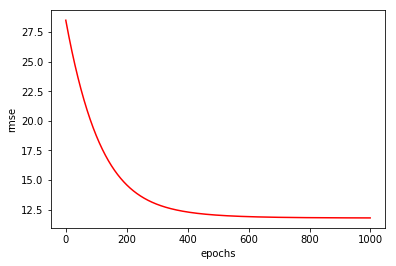

In [80]:
plt.xlabel("epochs")
plt.ylabel("rmse")
plt.plot( np.arange(epochs),test_set_rmse,'r')

# Using steplength backtracking on parkinson dataset

In [98]:
epochs = 1000 # The number of iterations to perform gradient descent
test_set_rmse = []
relative_loss=[]
# Performing Gradient Descent 
for i in range(epochs): 
    ypred = prediction(Xtrain_park,betas,bias) # The current predicted value of Y
    
    lossa  = cost(ytrain_park,ypred)
    
    lr =  backtracking(Xtrain_park,ytrain_park,betas,bias,alpha = 0.2, beta = 0.6)
    
    betas = betas - lr * np.sum(2/m_train * (ypred - ytrain_park) * ytrain_park, axis = 0)
    bias  = bias  - lr * np.sum(2/m_train * (ypred - ytrain_park), axis = 0)
    
    testrmse = rmse(ytest_park,prediction(Xtest_park,betas,bias))
    test_set_rmse.append(testrmse)
    
    ypred = prediction(Xtrain_park,betas,bias) # The current predicted value of Y
    lossb  = cost(ytrain_park,ypred)
    
    relative_loss.append(np.abs(lossb -lossa))
    if i % 50 == 0:
        print(f"epochs: {i} loss: {np.abs(lossb -lossa)} testrmse: {testrmse}")

epochs: 0 loss: 268.39728953370684 testrmse: 23.581852733116456
epochs: 50 loss: 0.0005542856373779159 testrmse: 11.79737149046883
epochs: 100 loss: 0.0005191671910154128 testrmse: 11.796269522513159
epochs: 150 loss: 0.0005188327428697903 testrmse: 11.795172565516417
epochs: 200 loss: 0.0005184984660218106 testrmse: 11.794076193806415
epochs: 250 loss: 0.0005181643249159151 testrmse: 11.792980407264498
epochs: 300 loss: 0.0005178303194384171 testrmse: 11.791885205776524
epochs: 350 loss: 0.0005174964494472079 testrmse: 11.790790589228337
epochs: 400 loss: 0.0005171627149991309 testrmse: 11.789696557505728
epochs: 450 loss: 0.0005168291160941862 testrmse: 11.788603110494483
epochs: 500 loss: 0.0005164956524765785 testrmse: 11.787510248080336
epochs: 550 loss: 0.0005161623243452595 testrmse: 11.786417970149007
epochs: 600 loss: 0.0005158291315012775 testrmse: 11.785326276586165
epochs: 650 loss: 0.0005154960738025238 testrmse: 11.784235167277478
epochs: 700 loss: 0.0005151631513626853 t

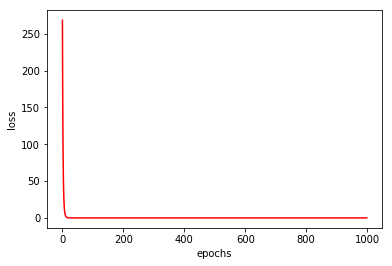

In [99]:
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot( np.arange(epochs),relative_loss,'r')

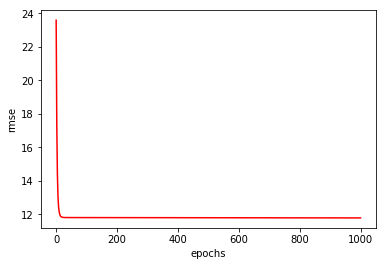

In [100]:
plt.xlabel("epochs")
plt.ylabel("rmse")
plt.plot( np.arange(epochs),test_set_rmse,'r')

# Using steplength-boldriver on parkinson datasets

In [104]:
lr=0.001
epochs = 1000 # The number of iterations to perform gradient descent
test_set_rmse = []
relative_loss=[]
# Performing Gradient Descent 
for i in range(epochs): 
    ypred = prediction(Xtrain_park,betas,bias) # The current predicted value of Y
    
    lossa  = cost(ytrain_park,ypred)
    
    lr =  bolddriver(Xtrain_park,ytrain_park,betas,bias,lr,mhuplus = 1.1, mhuminus = 0.4)
    
    betas = betas - lr * np.sum(2/m_train * (ypred - ytrain_park) * ytrain_park, axis = 0)
    bias  = bias  - lr * np.sum(2/m_train * (ypred - ytrain_park), axis = 0)
    
    testrmse = rmse(ytest_park,prediction(Xtest_park,betas,bias))
    test_set_rmse.append(testrmse)
    
    ypred = prediction(Xtrain_park,betas,bias) # The current predicted value of Y
    lossb  = cost(ytrain_park,ypred)
    
    relative_loss.append(np.abs(lossb -lossa))
    if i % 50 == 0:
        print(f"epochs: {i} loss: {np.abs(lossb -lossa)} testrmse: {testrmse}")

epochs: 0 loss: 459.5311085049361 testrmse: 19.187271717704746
epochs: 50 loss: 0.001201454980247263 testrmse: 11.795931600525062
epochs: 100 loss: 0.0014421211040200888 testrmse: 11.793418255047245
epochs: 150 loss: 0.0017309415019894914 testrmse: 11.790855034429368
epochs: 200 loss: 0.0008310697690490088 testrmse: 11.788384226992758
epochs: 250 loss: 0.0009975355102369576 testrmse: 11.785873144206128
epochs: 300 loss: 0.0011973445899116086 testrmse: 11.783365285998693
epochs: 350 loss: 0.0014371730324285181 testrmse: 11.780857366898223
epochs: 400 loss: 0.0017249848890230624 testrmse: 11.778299705396801
epochs: 450 loss: 0.0008282015983525071 testrmse: 11.775834280669429
epochs: 500 loss: 0.0009941099968102662 testrmse: 11.773374442465736
epochs: 550 loss: 0.0011932209610847622 testrmse: 11.770872039589387
epochs: 600 loss: 0.0014322090327141268 testrmse: 11.768369600395603
epochs: 650 loss: 0.0017190562192865855 testrmse: 11.765863223189559
epochs: 700 loss: 0.0008253468342331871 te

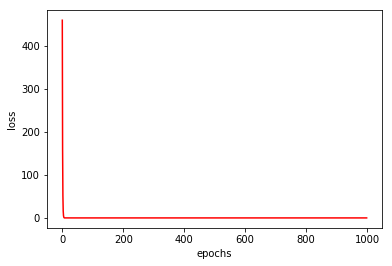

In [105]:
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot( np.arange(epochs),relative_loss,'r')

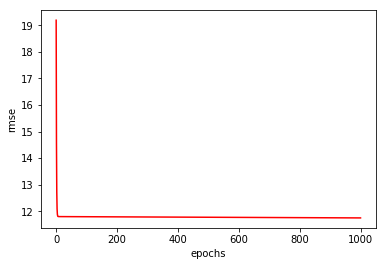

In [106]:
plt.xlabel("epochs")
plt.ylabel("rmse")
plt.plot( np.arange(epochs),test_set_rmse,'r')